Make up the original environment.

In [1]:
import numpy as np

class SinEnv:
    def __init__(self, episode_length=20):
        self.reset()
        self.step_size = 2 * np.pi / episode_length
        self.episode_length = episode_length
        
    def step(self, action):
        # update state
        self.x += self.step_size
        self.y += action[0]
        self.t += 1
        
        # compute reward
        reward = -((self.y - np.sin(self.x)) ** 2)
        
        done = self.t == self.episode_length
        
        return np.array([self.x, self.y], dtype=np.float32), reward, done, {}
    
    def reset(self):
        self.x = -np.pi
        self.y = np.random.uniform(low=-1.0, high=1.0)
        self.t = 0
        return np.array([self.x, self.y], dtype=np.float32)

Generate dataset.

In [2]:
N_EPISODES = 1000
EPISODE_LENGTH = 20

observations = []
actions = []
rewards = []
terminals = []

# this process would be done in the real world in practice
env = SinEnv(episode_length=EPISODE_LENGTH)
for _ in range(N_EPISODES):
    observation = env.reset()
    reward = 0.0
    done = False
    
    while not done:
        # sample random action
        action = [np.random.uniform(-1.0, 1.0)]
        
        # append to dataset
        observations.append(observation)
        actions.append(action)
        rewards.append(reward)
        terminals.append(0.0)
        
        observation, reward, done, _ = env.step(action)

    # append last state to dataset
    observations.append(observation)
    actions.append([0.0])
    rewards.append(reward)
    terminals.append(1.0)
    
# convert list to ndarray
observations = np.array(observations)
actions = np.array(actions)
rewards = np.array(rewards)
terminals = np.array(terminals)

Visualize dataset episode.

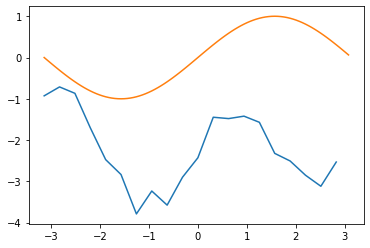

In [4]:
import matplotlib.pyplot as plt

# plot random trajectory
plt.plot(observations[:20, 0], observations[:20, 1])

# plot reference trajectory
x = np.arange(100) * 2 * np.pi / 100.0 - np.pi
y = np.sin(x)
plt.plot(x, y)

Setup data-driven deep reinforcement learning algorithm.

In [5]:
from d3rlpy.dataset import MDPDataset
from d3rlpy.algos import CQL
from d3rlpy.metrics.scorer import evaluate_on_environment
from d3rlpy.metrics.scorer import discounted_sum_of_advantage_scorer
from sklearn.model_selection import train_test_split

# setup dataset
dataset = MDPDataset(observations, actions, rewards, terminals)

# setup algorithm
cql = CQL()

train_episodes, test_episodes = train_test_split(dataset, test_size=0.2)

# train
cql.fit(train_episodes,
        eval_episodes=test_episodes,
        n_epochs=10,
        scorers={
            'environment': evaluate_on_environment(env),
            'advantage': discounted_sum_of_advantage_scorer
        })

  1%|▏         | 2/160 [00:00<00:11, 13.76it/s]

actor_learning_rate=0.001
alpha_learning_rate=0.001
alpha_threshold=10.0
batch_size=100
bootstrap=False
critic_learning_rate=0.001
eps=1e-08
gamma=0.99
initial_alpha=5.0
initial_temperature=1.0
n_action_samples=10
n_critics=2
q_func_type=mean
scaler=None
tau=0.005
temp_learning_rate=0.001
update_actor_interval=1
use_batch_norm=False
use_gpu=None
observation_shape=(2,)
action_size=1


  1%|▏         | 2/160 [00:00<00:09, 15.97it/s]

epoch=0 step=160 critic_loss=-55.220544
epoch=0 step=160 actor_loss=4.520806
epoch=0 step=160 temp_loss=1.323342
epoch=0 step=160 temp=0.927833
epoch=0 step=160 alpha_loss=81.929810
epoch=0 step=160 alpha=4.629778
epoch=0 step=160 environment=-2.729725
epoch=0 step=160 advantage=-16.460317


  1%|▏         | 2/160 [00:00<00:10, 15.46it/s]

epoch=1 step=320 critic_loss=-47.602399
epoch=1 step=320 actor_loss=5.692252
epoch=1 step=320 temp_loss=0.910432
epoch=1 step=320 temp=0.813213
epoch=1 step=320 alpha_loss=62.115672
epoch=1 step=320 alpha=4.018552
epoch=1 step=320 environment=-2.694889
epoch=1 step=320 advantage=-27.755397


  1%|▏         | 2/160 [00:00<00:10, 15.69it/s]

epoch=2 step=480 critic_loss=-33.199145
epoch=2 step=480 actor_loss=6.533099
epoch=2 step=480 temp_loss=0.706924
epoch=2 step=480 temp=0.725117
epoch=2 step=480 alpha_loss=48.758065
epoch=2 step=480 alpha=3.552526
epoch=2 step=480 environment=-1.488867
epoch=2 step=480 advantage=-32.786979


  1%|▏         | 2/160 [00:00<00:09, 16.30it/s]

epoch=3 step=640 critic_loss=-23.292250
epoch=3 step=640 actor_loss=7.109402
epoch=3 step=640 temp_loss=0.563224
epoch=3 step=640 temp=0.653125
epoch=3 step=640 alpha_loss=39.793605
epoch=3 step=640 alpha=3.180002
epoch=3 step=640 environment=-1.472099
epoch=3 step=640 advantage=-39.490329


  1%|▏         | 2/160 [00:00<00:10, 15.50it/s]

epoch=4 step=800 critic_loss=-16.637987
epoch=4 step=800 actor_loss=7.492128
epoch=4 step=800 temp_loss=0.471153
epoch=4 step=800 temp=0.594442
epoch=4 step=800 alpha_loss=33.582490
epoch=4 step=800 alpha=2.869059
epoch=4 step=800 environment=-1.238932
epoch=4 step=800 advantage=-44.316655


  1%|▏         | 2/160 [00:00<00:10, 15.67it/s]

epoch=5 step=960 critic_loss=-13.546756
epoch=5 step=960 actor_loss=7.672903
epoch=5 step=960 temp_loss=0.392997
epoch=5 step=960 temp=0.544706
epoch=5 step=960 alpha_loss=29.001915
epoch=5 step=960 alpha=2.609078
epoch=5 step=960 environment=-1.913881
epoch=5 step=960 advantage=-43.790341


  1%|▏         | 2/160 [00:00<00:10, 15.44it/s]

epoch=6 step=1120 critic_loss=-11.288606
epoch=6 step=1120 actor_loss=7.849886
epoch=6 step=1120 temp_loss=0.338124
epoch=6 step=1120 temp=0.501722
epoch=6 step=1120 alpha_loss=25.673175
epoch=6 step=1120 alpha=2.379202
epoch=6 step=1120 environment=-0.895442
epoch=6 step=1120 advantage=-43.157535


  1%|▏         | 2/160 [00:00<00:09, 16.22it/s]

epoch=7 step=1280 critic_loss=-10.369265
epoch=7 step=1280 actor_loss=8.003370
epoch=7 step=1280 temp_loss=0.286628
epoch=7 step=1280 temp=0.464183
epoch=7 step=1280 alpha_loss=22.931230
epoch=7 step=1280 alpha=2.177758
epoch=7 step=1280 environment=-1.807414
epoch=7 step=1280 advantage=-47.898952


  1%|▏         | 2/160 [00:00<00:11, 13.77it/s]

epoch=8 step=1440 critic_loss=-9.653453
epoch=8 step=1440 actor_loss=8.040083
epoch=8 step=1440 temp_loss=0.252478
epoch=8 step=1440 temp=0.431968
epoch=8 step=1440 alpha_loss=20.679711
epoch=8 step=1440 alpha=1.997895
epoch=8 step=1440 environment=-1.396702
epoch=8 step=1440 advantage=-47.419231


100%|██████████| 160/160 [00:10<00:00, 14.98it/s]


epoch=9 step=1600 critic_loss=-8.958304
epoch=9 step=1600 actor_loss=8.105654
epoch=9 step=1600 temp_loss=0.216535
epoch=9 step=1600 temp=0.403329
epoch=9 step=1600 alpha_loss=18.959006
epoch=9 step=1600 alpha=1.836348
epoch=9 step=1600 environment=-0.568552
epoch=9 step=1600 advantage=-48.046190


Visualize trajectories.

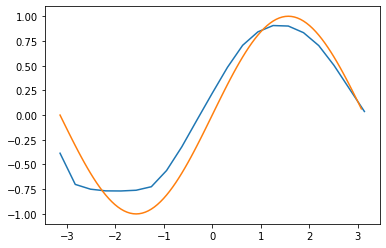

In [6]:
def visualize(algo, env):
    observation = env.reset()
    observations = [observation]
    while True:
        action = algo.predict([observation])[0]
        observation, _, done, _ = env.step(action)
        observations.append(observation)
        if done:
            break
    
    observations = np.array(observations)
    
    # plot trajectory
    plt.plot(observations[:, 0], observations[:, 1])
    
    # plot sin curve
    x = np.arange(100) * 2 * np.pi / 100.0 - np.pi
    y = np.sin(x)
    plt.plot(x, y)
    
visualize(cql, env)